# CS - 3. Common Algorithms - 3.5 Graph - 3.5.2 Depth First Search(DFS)

Depth First Search
💡Depth first search is a graph traversal algorithm that starts at a root node and explores as far as possible along each branch before backtracking.

깊이 우선 검색은 루트 노드에서 시작하여 각 분기를 따라 가능한 한 멀리 탐색한 후 역추적하는 그래프 탐색 알고리즘입니다.

먼저, 깊이 우선 탐색(Depth First Search, DFS)에 대해 설명드리겠습니다.

DFS는 루트 노드(혹은 다른 임의의 노드)에서 시작해서 다음 분기(branch)로 넘어가기 전에 해당 분기를 완벽하게 탐색하는 알고리즘입니다. 데이터의 구조가 트리 혹은 그래프 형태일 때 사용하며, 모든 노드를 방문하고자 하는 경우에 이 방법을 선택합니다.


DFS의 동작 과정은 다음과 같습니다

1. 루트 노드를 스택에 넣습니다.
2. 현재 스택의 맨 위 노드를 확인합니다.
3. 현재 노드에 방문하지 않은 인접 노드가 있으면 그 노드를 스택에 넣고 방문처리를 합니다. 방문하지 않은 인접 노드가 없으면 스택에서 맨 위 노드를 꺼냅니다.
4. 더 이상 2번의 과정을 진행할 수 없을 때까지 반복합니다.

 

주의점은 깊이가 무한대가 될 때이다. 특히 루프(회로)가 있는경우 DFS는 엣지를 탈출할수 없게 된다.

깊이가 아주 깊어도 스택 오버플로우가 발생할수 있으므로 주의해야한다.

## In Python
DFS를 구현하는 방법에는 스택배열과 재귀(3.2. Recursion)를 사용할수도 있다.


#### 3.5.2.1 DFS - 스택배열로 구현하기

In [9]:
def DFS(graph, root):
    visited = []
    stack = [root]

    while stack:
        n = stack.pop()
        if n not in visited:
            visited.append(n)
            stack += graph[n] - set(visited)
    return visited


In [10]:
graph = {
    1: [2, 3],
    2: [4, 5],
    3: [6],
    4: [],
    5: [7],
    6: [],
    7: []
}

print(DFS(graph, 1))

TypeError: unsupported operand type(s) for -: 'list' and 'set'

리스트와 set() 간에 - 연산이 지원되지 않는다. 위의 함수에서 stack += graph[n] - set(visted) 에서

graph 도 set()을 씌워주면 된다.

In [11]:
def DFS(graph, root):
    visited = []
    stack = [root]

    while stack:
        n = stack.pop()
        if n not in visited:
            visited.append(n)
            stack += set(graph[n]) - set(visited)
    return visited


In [12]:
graph = {
    1: [2, 3],
    2: [4, 5],
    3: [6],
    4: [],
    5: [7],
    6: [],
    7: []
}

print(DFS(graph, 1))


[1, 3, 6, 2, 5, 7, 4]


DFS 대로 잘 보인다.

앞장에서 그래프를 시각화 하는 코드를 이용해서 시각화 해보면 이렇다.

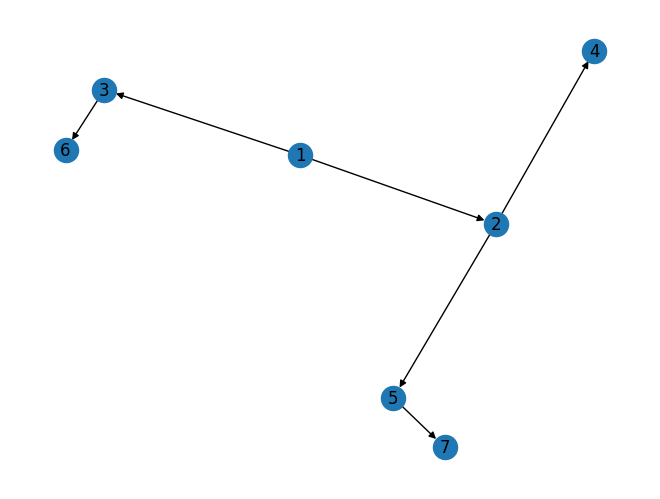

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

graph = {
    1: [2, 3],
    2: [4, 5],
    3: [6],
    4: [],
    5: [7],
    6: [],
    7: []
}

G = nx.DiGraph()

for node, edges in graph.items():
    for edge in edges:
        G.add_edge(node, edge)

nx.draw(G, with_labels=True)
plt.show()


1 - 2,3 이 있는데 

위의 함수는 시작 노드에서 가장 멀리 있는 노드부터 방문하게 된다. (1-3-6)

그런 순서대로 1-2-5-7, 1-2-4 를 방문하게 된다.

 

지금 위의 함수에는 살짝 오류가있는데,

원래라면 1-2,3 에서 작은 노드 순서대로 방문해야 하는데, pop()을 사용해서 {2,3}에서 제일 뒤의 3부터 방문하게 되었다.

( pop()을 사용한 이유는 시간 복잡도가 O(1) 이기 때문이다. pop(0)을 사용하게되면 가장 앞의 원소를 제거하고 반환하지만 리스트의 모든 원소를 한칸씩 이동시켜야하므로 시간 복잡도가 O(n) 이 된다.)

pop(0)을 사용해 제대로 DFS를 만든다면,

In [32]:
def dfs2(graph: dict, start: int):
    # 각 노드의 방문 여부를 저장하는 딕셔너리를 초기화합니다.
    # 초기에는 모든 노드를 방문하지 않았으므로 모든 노드의 값은 False입니다.
    visited = {node: False for node in graph.keys()}

    # 재귀적으로 DFS를 수행하는 함수를 정의합니다.
    def search(current: int):
        # 현재 노드를 방문했다고 표시합니다.
        visited[current] = True

        # 현재 노드의 모든 인접 노드를 확인합니다.
        for next_node in graph[current]:
            # 인접 노드를 아직 방문하지 않았다면, 그 노드를 방문합니다.
            if not visited[next_node]:
                search(next_node)

    # 시작 노드부터 DFS를 시작합니다.
    search(start)


제대로 1-2,3 에서 2 노드부터 탐색을 하게 되었다.

#### 3.5.2.2 DFS - 재귀호출로 구현하기

 

In [41]:
def dfs_recursion(graph: dict, start: int):
    visited = {node: False for node in graph.keys()}
    result = []  # 방문한 노드를 저장할 리스트

    def search(current: int):
        visited[current] = True
        result.append(current)  # 방문한 노드를 result에 추가

        for next_node in graph[current]:
            if not visited[next_node]:
                search(next_node)

    search(start)
    return result  # 방문한 노드의 순서를 반환

search 함수 내에서 search(next_node)로 재귀 호출로써 구현한다.

현재 노드의 인접 노드들 중 아직 방문하지 않은 노드가 있다면, 그 노드를 다시 search 함수의 인자로 넣어서 함수를 호출한다.

In [42]:
graph = {
    1: [2, 3],
    2: [4, 5],
    3: [6],
    4: [],
    5: [7],
    6: [],
    7: []
}

print(dfs_recursion(graph, 1))


[1, 2, 4, 5, 7, 3, 6]


## BFS 와 DFS
 

백트래킹(Backtracking).

모든 경우의 수를 전부 고려하는 알고리즘 에 적합한 방식들이다.

경우에 따라 다르지만, 일반적으로 경우의 수에서는 DFS가 유리하다. 

 

1. 모든 가능성 탐색 

- DFS 는 한방향으로 끝까지 탐색한 후 다른 방향으로 탐색을 진행하기에 백트래킹 문제인 모든 가능성을 탐색하는데 유리핟.

 

2. 메모리 효율성

- BFS는 큐를 사용해 모든 노드를 저장한다.

  반면 DFS는 스택을 사용해 현재 경로상의 노드만을 저장하므로 메모리 사용량이 적다.

 

3. 해답 도달 시 빠른 종료

- DFS는 해답에 도달하면 즉시 탐색을 종료할 수 있다.

  반면 BFS는 모든 노드를 방문해야 하므로 종료 시점이 늦어질 수 있다.

 

 

DFS 사용시 주의해야 할 점은 아주 치명적인 오류를 발생시키므로 앞에서도 다뤘었다.

다시 정리해보자면,

 

1. 무한 루프

- DFS는 재귀 호출을 사용하므로, 잘못 구현시 무한 루프에 빠질 수 있다.

 따라서 방문한 노드를 체크해야 하며, 재귀 호출의 종료 조건을 명확히 설정해야 한다.

 

2. 스택 오버플로우

- 재귀 호출의 깊이가 너무 깊어지면 스택 오버플로우가 발생하기 쉽다.

이를 방지하기위해 반복문을 사용한 DFS 구현을 고려할 수 도 있다.

 